## Data Analysis on Ipl dataset

### Importing Libraries

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Loading data

In [3]:
#look in dir
data= pd.read_csv('deliveries.csv')
type(data)

pandas.core.frame.DataFrame

### EDA
#### looking into data

In [4]:
#look at top 5 rows of dataset
data.head() #to get the summary of data default return top 5 rows

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
#check the length of data
len(data)

150460

In [6]:
#no of rows and coloumn
data.shape

(150460, 21)

In [7]:
#check for size
data.size

3159660

In [8]:
#dimention
data.ndim

2

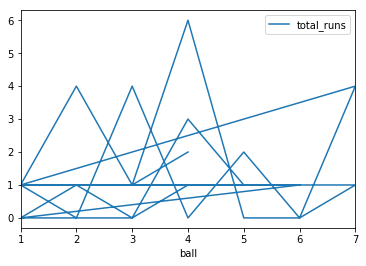

In [9]:
%matplotlib inline   
data.head(30).plot(x='ball',y='total_runs');
#here ball and total_runs are the data element
# %matplotlib inline -> it means that all the figure should be made in our jupyter notebook no in any other file

### Shows data for the first over

In [10]:
data[(data["over"]==1)]
#Only show that data where the over value is one
#df1 = df[(df.a != -1) & (df.b != -1)]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN


In [11]:
print(f'Total number of runs scored in first over {data[data.over==1]["total_runs"].sum()}')

Total number of runs scored in first over 7733


[485, 918, 873, 91, 209, 999, 909, 931, 684, 713, 482, 103, 264, 72]


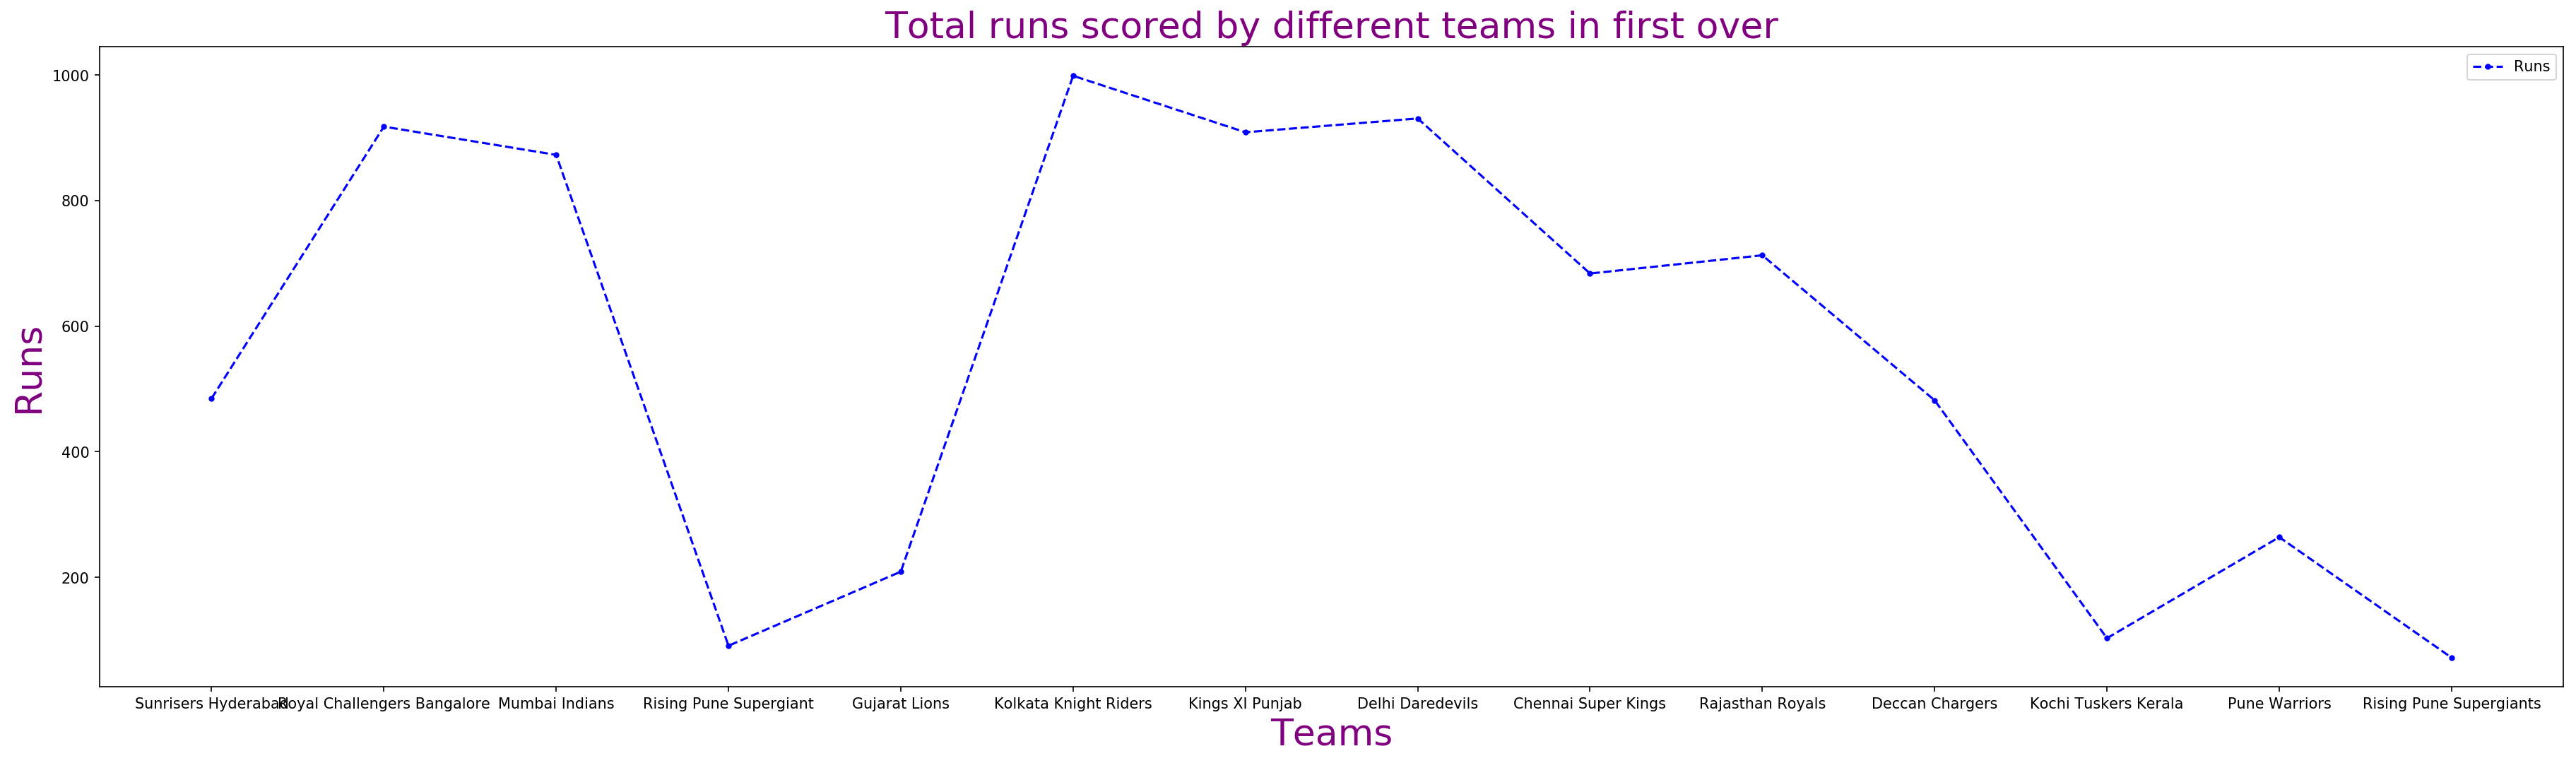

In [60]:
length = len(data.batting_team.unique())
lst = [data.batting_team.unique()[i]  for i in range(0,14)]
plt.figure(figsize=(30,8),dpi=150)
run = []
font = {'color':  'purple',
        'weight': 'normal',
        'size': 25}
for i in lst:
    run.append(data[(data.over==1) & (data["batting_team"]==i)]["total_runs"].sum())
print(run)
plt.plot(run,'b.--',label='Runs')
plt.title("Total runs scored by different teams in first over",fontdict=font)
plt.xlabel("Teams",fontdict=font)
plt.ylabel("Runs",fontdict=font)
plt.xticks(np.arange(length), (lst))
plt.legend()
plt.show()

[607, 1159, 1385, 157, 184, 925, 1135, 1007, 1191, 803, 556, 76, 338, 124]


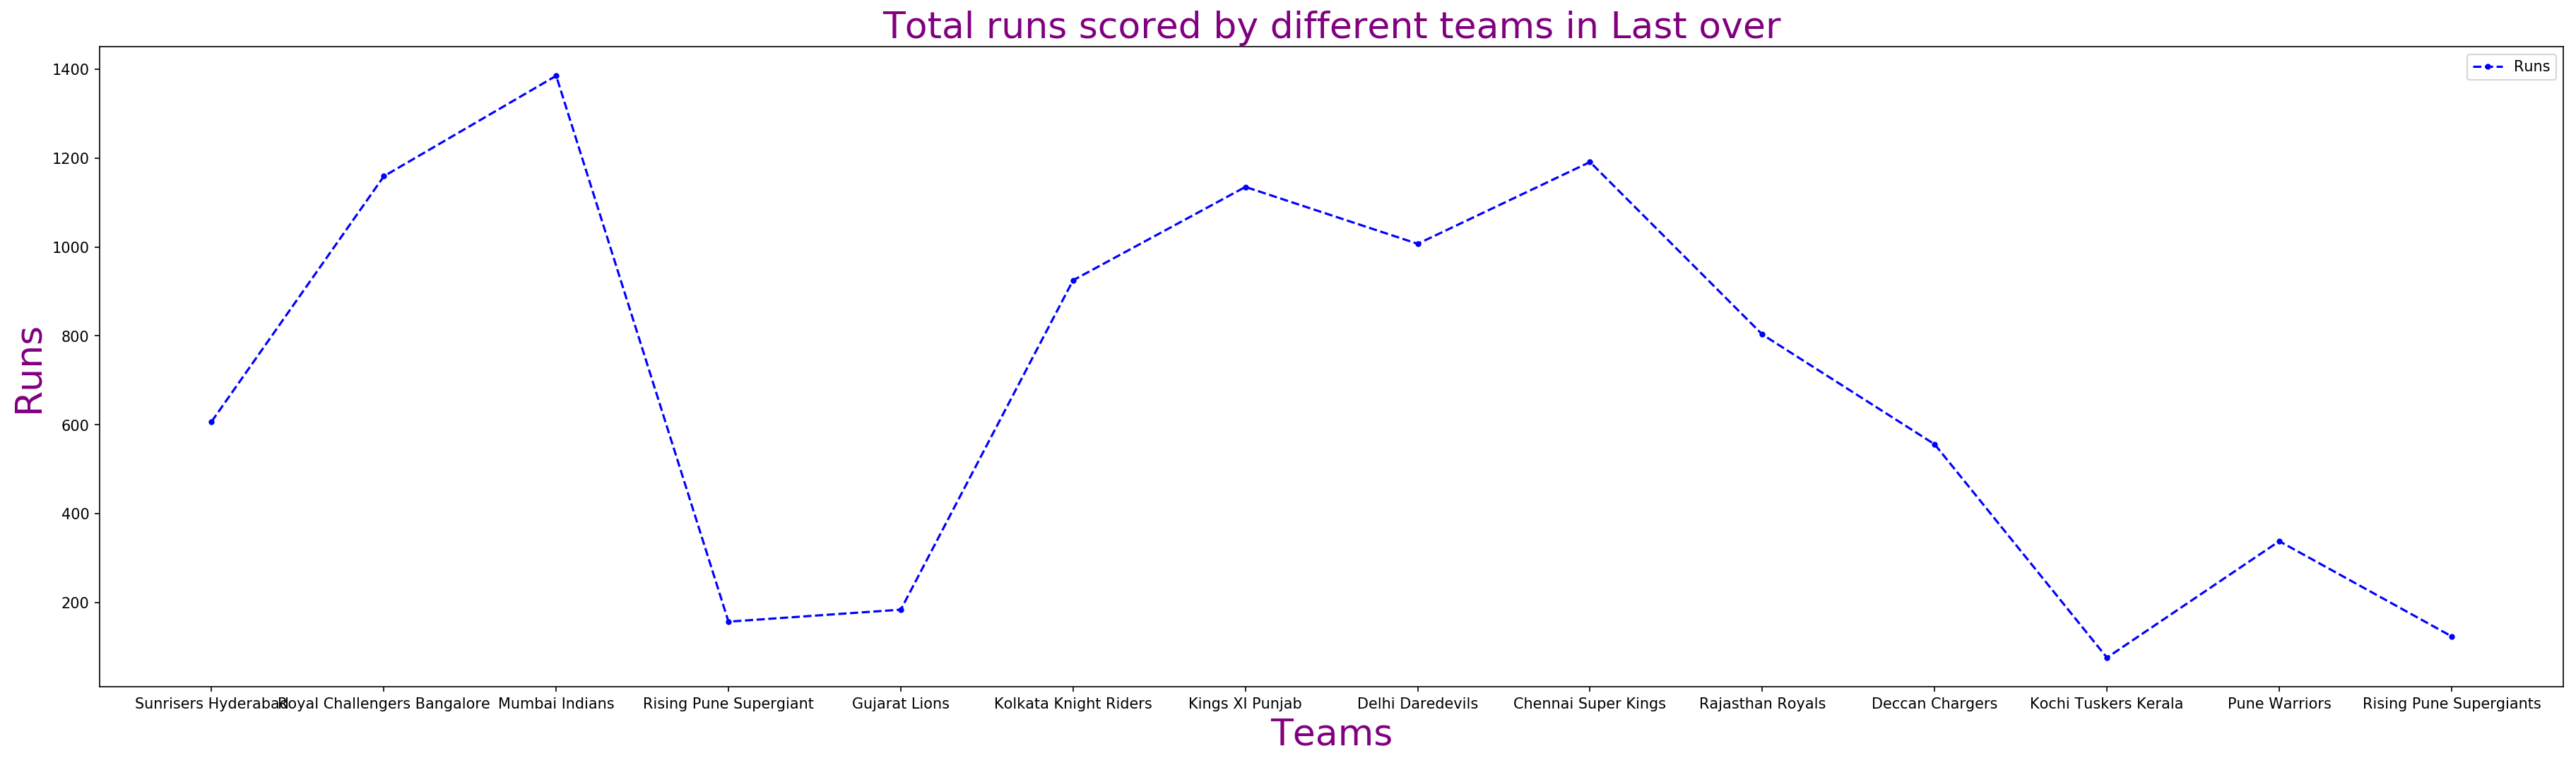

In [59]:
length = len(data.batting_team.unique())
lst = [data.batting_team.unique()[i]  for i in range(0,14)]
plt.figure(figsize=(30,8),dpi=150)
run = []
font = {'color':  'purple',
        'weight': 'normal',
        'size': 25}
for i in lst:
    run.append(data[(data.over==20) & (data["batting_team"]==i)]["total_runs"].sum())
print(run)
plt.plot(run,'b.--',label='Runs')
plt.title("Total runs scored by different teams in Last over",fontdict=font)
plt.xlabel("Teams",fontdict=font)
plt.ylabel("Runs",fontdict=font)
plt.xticks(np.arange(length), (lst))
plt.legend()
plt.show()

In [64]:
## Checking whether the graph is correct or not
data[(data.batting_team=="Kolkata Knight Riders") & (data.over==1)]["total_runs"].sum()

999

In [49]:
### fetching out the data for first over of inning 1 for match_id 1 
data[(data["over"]==1) & (data["inning"]==1) &(data["match_id"]==1)]
#over ==1 and innings ==1 match id ==1 fetch all data

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN


In [65]:
# finding out the total number of no ball run in match between sunrises hydrabad and rcb
no_ball_1 = data[(data["batting_team"]=="Sunrisers Hyderabad") & (data["bowling_team"]=="Royal Challengers Bangalore") & (data["noball_runs"] > 0) ]  
no_ball_1

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
91904,388,3,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,NLTC Perera,CL White,R Vinay Kumar,1,...,0,0,1,0,1,1,2,NaN,NaN,NaN
102366,432,1,Sunrisers Hyderabad,Royal Challengers Bangalore,17,2,NLTC Perera,CL White,R Vinay Kumar,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
113885,481,1,Sunrisers Hyderabad,Royal Challengers Bangalore,5,3,DA Warner,S Dhawan,VR Aaron,0,...,0,0,1,0,0,1,1,NaN,NaN,NaN
124672,525,2,Sunrisers Hyderabad,Royal Challengers Bangalore,17,7,KL Rahul,S Dhawan,AN Ahmed,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
124673,525,2,Sunrisers Hyderabad,Royal Challengers Bangalore,17,8,S Dhawan,KL Rahul,AN Ahmed,0,...,0,0,1,0,6,1,7,NaN,NaN,NaN
134476,568,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,1,DA Warner,MC Henriques,AB Dinda,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
134481,568,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,6,MC Henriques,DA Warner,AB Dinda,0,...,0,0,1,0,4,1,5,NaN,NaN,NaN
142511,603,1,Sunrisers Hyderabad,Royal Challengers Bangalore,6,1,DA Warner,KS Williamson,HV Patel,0,...,0,0,1,0,4,1,5,NaN,NaN,NaN


In [66]:
no_ball_2 = data[(data["batting_team"]=="Royal Challengers Bangalore") & (data["bowling_team"]=="Sunrisers Hyderabad") & (data["noball_runs"] > 0) ]
no_ball_2

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
182,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,10,1,KM Jadhav,TM Head,MC Henriques,0,...,0,0,1,0,1,1,2,NaN,NaN,NaN
137127,580,1,Royal Challengers Bangalore,Sunrisers Hyderabad,19,1,KM Jadhav,SN Khan,B Kumar,0,...,0,0,1,0,4,1,5,NaN,NaN,NaN


In [67]:
no_ball_3 = no_ball_1["noball_runs"].sum() + no_ball_2["noball_runs"].sum()
no_ball_3

11

In [68]:
over = data[(data["match_id"]==1)]
## fetch out all the data with match_id == 1 and from that fetch only over column 
run = data[(data["match_id"] == 1) & (data['over'] ==1) ]['total_runs'].sum()
#fetch all the data with match id 1 and over == 1   and from all of the table fetch total runs and calculate there sum
# it basicall gives "total runs in 1st over of match 1"
run

18

In [69]:
##over["over"].head(20)

In [70]:
## to get the batsman name batting in over 1
data2 = data[(data["over"]==1)]["batsman"]
#give all the batsman batted in first ovwe
data3 = data[(data["over"]==1)]["batsman"].value_counts()
#give all the batsman count batted in first ovwe
pd.DataFrame(data2)

,batsman
0,DA Warner
1,DA Warner
2,DA Warner
3,DA Warner
4,DA Warner
5,S Dhawan
6,S Dhawan
125,CH Gayle
126,Mandeep Singh
127,Mandeep Singh


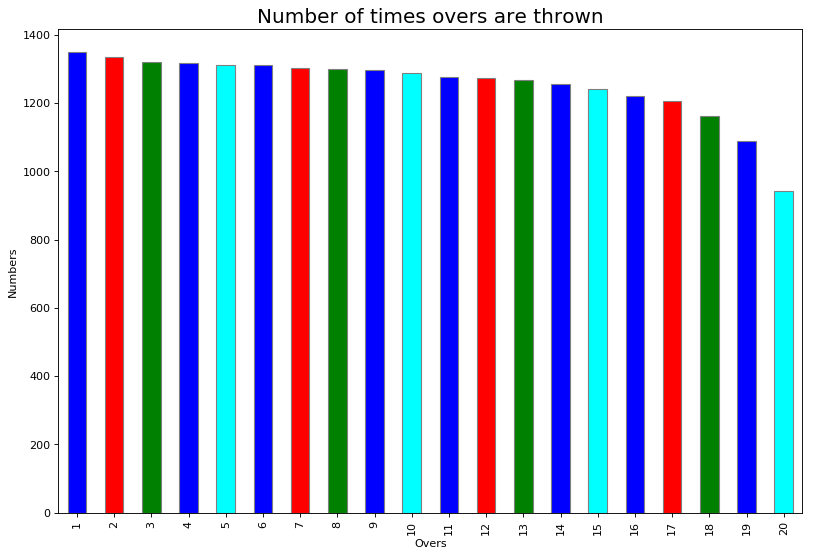

In [102]:
plt.figure(figsize=(12,8),dpi=80)
(data["over"].value_counts()/6).plot(kind='bar',color=['blue', 'red', 'green', 'blue', 'cyan'],edgecolor='gray');
plt.title("Number of times overs are thrown",fontdict={'size':18})
plt.xlabel("Overs")
plt.ylabel("Numbers")
plt.show()
## no of times an over is happen

In [72]:
matches = pd.read_csv("matches.csv")

In [73]:
matches.head()
#top 5 data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [74]:
matches["player_of_match"].value_counts()
#man of the match count

CH Gayle             18
YK Pathan            16
DA Warner            15
AB de Villiers       15
SK Raina             14
RG Sharma            14
MS Dhoni             13
G Gambhir            13
AM Rahane            12
MEK Hussey           12
V Kohli              11
DR Smith             11
V Sehwag             11
SR Watson            10
JH Kallis            10
A Mishra              9
SE Marsh              9
KA Pollard            9
SR Tendulkar          8
RV Uthappa            7
AC Gilchrist          7
RA Jadeja             7
AT Rayudu             7
AD Russell            6
M Vijay               6
A Nehra               6
UT Yadav              6
Harbhajan Singh       6
SP Narine             6
BJ Hodge              6
                     ..
KS Williamson         1
BA Bhatt              1
MS Gony               1
MA Starc              1
JJ Bumrah             1
MF Maharoof           1
AD Mascarenhas        1
TM Dilshan            1
RJ Harris             1
DP Nannes             1
DJ Hooda        

In [103]:
#calculate the highest number of man of the match winner count
labels = matches["player_of_match"].value_counts().head(15)
name = labels.max()
name

18

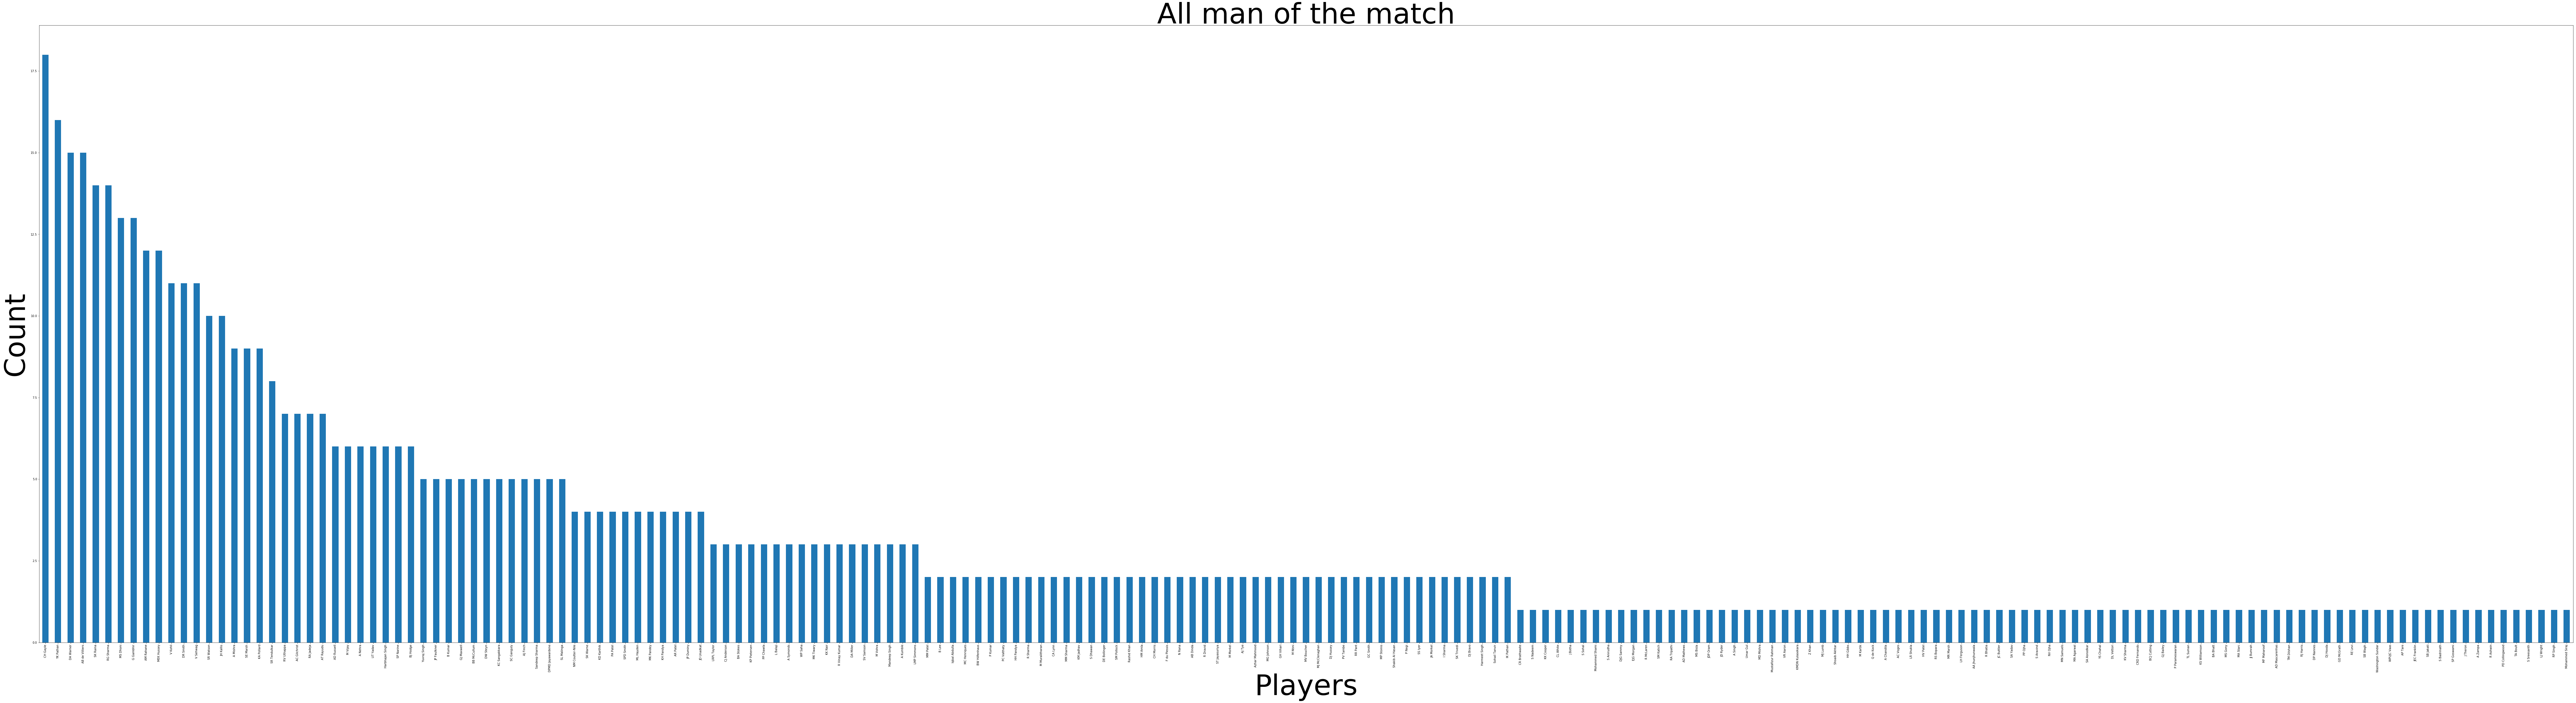

In [113]:
#plot all
matches["player_of_match"].value_counts().plot(kind="bar",figsize=(160,40));
font = {"size":100}
plt.title("All man of the match",fontdict=font)
plt.xlabel("Players",fontdict=font)
plt.ylabel("Count",fontdict=font)
plt.show()

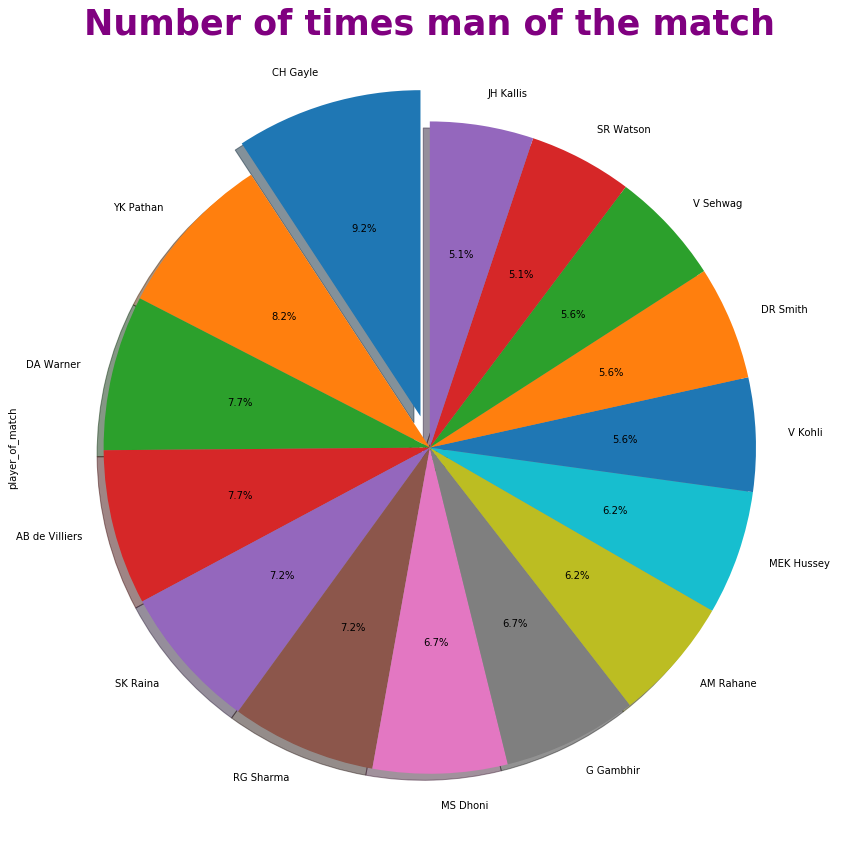

In [118]:
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

matches["player_of_match"].value_counts().head(15).plot(kind="pie",explode=explode,figsize=(15,15),autopct='%1.1f%%',
        shadow=True, startangle=90);
plt.title("Number of times man of the match",fontdict={"size":35,'color':'purple','weight':'bold'})
plt.show()

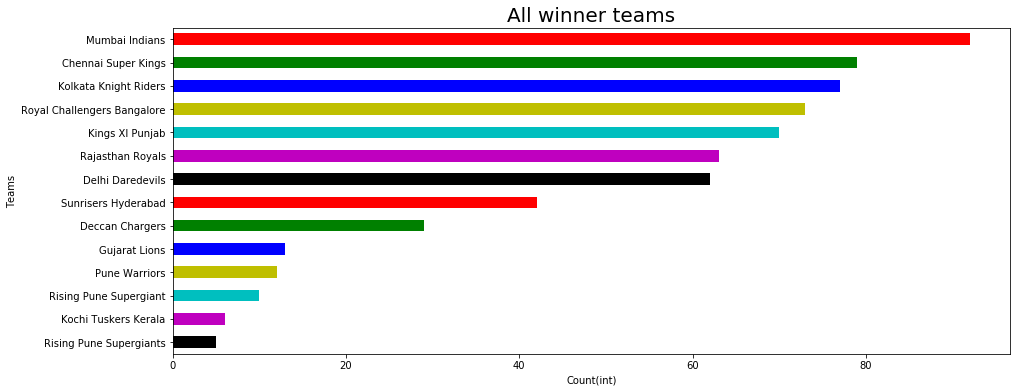

In [132]:
color=['r','g','b','y','c','m','k']
matches['winner'].value_counts().plot(kind="barh", figsize=(15,6),color=color).invert_yaxis();
plt.title("All winner teams",fontdict={"size":20})
plt.ylabel("Teams")
plt.xlabel("Count(int)")
plt.show()
#winner team

In [79]:
matches["toss_winner"].value_counts()
#all toss winner

Mumbai Indians                 85
Kolkata Knight Riders          78
Delhi Daredevils               72
Royal Challengers Bangalore    70
Kings XI Punjab                68
Chennai Super Kings            66
Rajasthan Royals               63
Deccan Chargers                43
Sunrisers Hyderabad            35
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

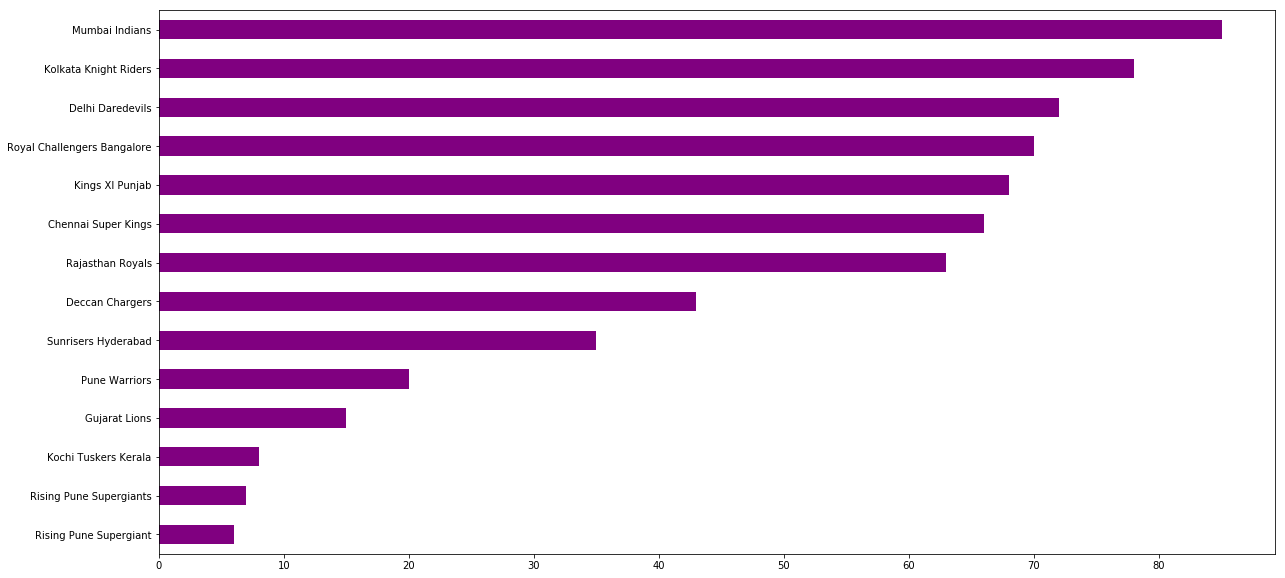

In [137]:
## Number of times teams win toss
matches["toss_winner"].value_counts().plot(kind="barh",color="purple",figsize=(20,10)).invert_yaxis()


In [81]:
matches[matches["toss_decision"]=="field"]["toss_winner"].value_counts()

Royal Challengers Bangalore    50
Kolkata Knight Riders          48
Delhi Daredevils               46
Mumbai Indians                 45
Kings XI Punjab                43
Rajasthan Royals               35
Chennai Super Kings            22
Deccan Chargers                19
Sunrisers Hyderabad            17
Gujarat Lions                  14
Pune Warriors                   9
Rising Pune Supergiant          6
Kochi Tuskers Kerala            5
Rising Pune Supergiants         4
Name: toss_winner, dtype: int64

In [82]:
matches[matches["toss_decision"]=="bat"]["toss_winner"].value_counts()

Chennai Super Kings            44
Mumbai Indians                 40
Kolkata Knight Riders          30
Rajasthan Royals               28
Delhi Daredevils               26
Kings XI Punjab                25
Deccan Chargers                24
Royal Challengers Bangalore    20
Sunrisers Hyderabad            18
Pune Warriors                  11
Kochi Tuskers Kerala            3
Rising Pune Supergiants         3
Gujarat Lions                   1
Name: toss_winner, dtype: int64

In [83]:
matches[(matches["toss_decision"]=="bat") & (matches["toss_winner"]== matches["winner"])]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
14,15,2017,Delhi,2017-04-15,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,normal,0,Delhi Daredevils,51,0,CJ Anderson,Feroz Shah Kotla,YC Barde,Nitin Menon,NaN
20,21,2017,Hyderabad,2017-04-19,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,15,0,KS Williamson,"Rajiv Gandhi International Stadium, Uppal",CB Gaffaney,NJ Llong,NaN
50,51,2017,Delhi,2017-05-12,Delhi Daredevils,Rising Pune Supergiant,Delhi Daredevils,bat,normal,0,Delhi Daredevils,7,0,KK Nair,Feroz Shah Kotla,KN Ananthapadmanabhan,CK Nandan,NaN
54,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin,NaN
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
60,61,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
73,74,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin,NaN
77,78,2008,Jaipur,2008-05-01,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,normal,0,Rajasthan Royals,45,0,SA Asnodkar,Sawai Mansingh Stadium,RE Koertzen,GA Pratapkumar,NaN
80,81,2008,Chandigarh,2008-05-03,Kings XI Punjab,Kolkata Knight Riders,Kings XI Punjab,bat,normal,0,Kings XI Punjab,9,0,IK Pathan,"Punjab Cricket Association Stadium, Mohali",DJ Harper,I Shivram,NaN


Chennai Super Kings            29
Mumbai Indians                 22
Kolkata Knight Riders          15
Rajasthan Royals               13
Deccan Chargers                11
Delhi Daredevils               10
Royal Challengers Bangalore     9
Sunrisers Hyderabad             7
Kings XI Punjab                 5
Pune Warriors                   3
Name: winner, dtype: int64

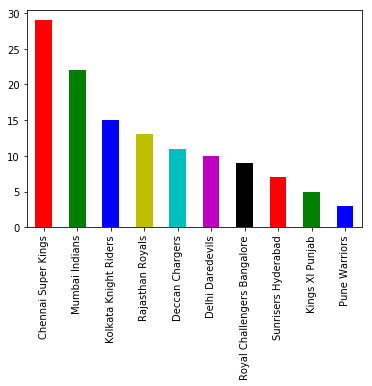

In [84]:
## Wining toss and also wining match
matches[(matches["toss_decision"]=="bat") & (matches["toss_winner"]== matches["winner"])]["winner"].value_counts().plot(kind="bar",color=color)
matches[(matches["toss_decision"]=="bat") & (matches["toss_winner"]== matches["winner"])]["winner"].value_counts()

Kolkata Knight Riders          29
Royal Challengers Bangalore    26
Mumbai Indians                 26
Kings XI Punjab                23
Delhi Daredevils               23
Rajasthan Royals               21
Chennai Super Kings            13
Gujarat Lions                  10
Sunrisers Hyderabad            10
Deccan Chargers                 8
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

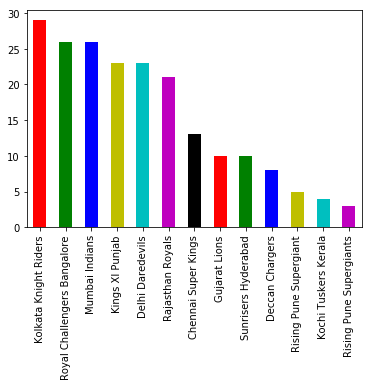

In [85]:
## Toss decision is field and winner of the match
matches[(matches["toss_decision"]=="field") & (matches["toss_winner"]== matches["winner"])]["winner"].value_counts().plot(kind="bar",color=color)
matches[(matches["toss_decision"]=="field") & (matches["toss_winner"]== matches["winner"])]["winner"].value_counts()

In [86]:
field=matches[(matches["toss_decision"]=="field") & (matches["toss_winner"]== matches["winner"])]["winner"].value_counts().sum()
bat = matches[(matches["toss_decision"]=="bat") & (matches["toss_winner"]== matches["winner"])]["winner"].value_counts().sum()
total = field + bat
total

325

In [87]:
##### Toss win != winner
bat_1=matches[(matches["toss_decision"]=="bat") & (matches["toss_winner"]!= matches["winner"])]
len(bat_1)


149

In [88]:
field_1 = matches[(matches["toss_decision"]=="field") & (matches["toss_winner"]!= matches["winner"])]
len(field_1)

162

In [89]:
total_2 = len(bat_1)+len(field_1)

In [90]:
grand_total = total + total_2
grand_total

636

In [91]:
len(matches)

636

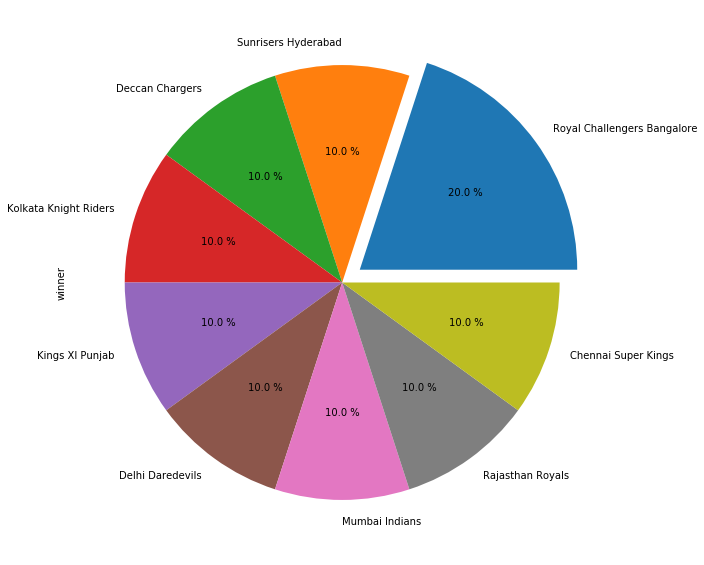

In [151]:
## Teams who win match by 10 wickets
explode = (0.1,0,0,0,0,0,0,0,0)
matches[matches["win_by_wickets"] == 10]["winner"].value_counts().plot(kind="pie",figsize=(10,10),autopct='%.1f %%',explode=explode)